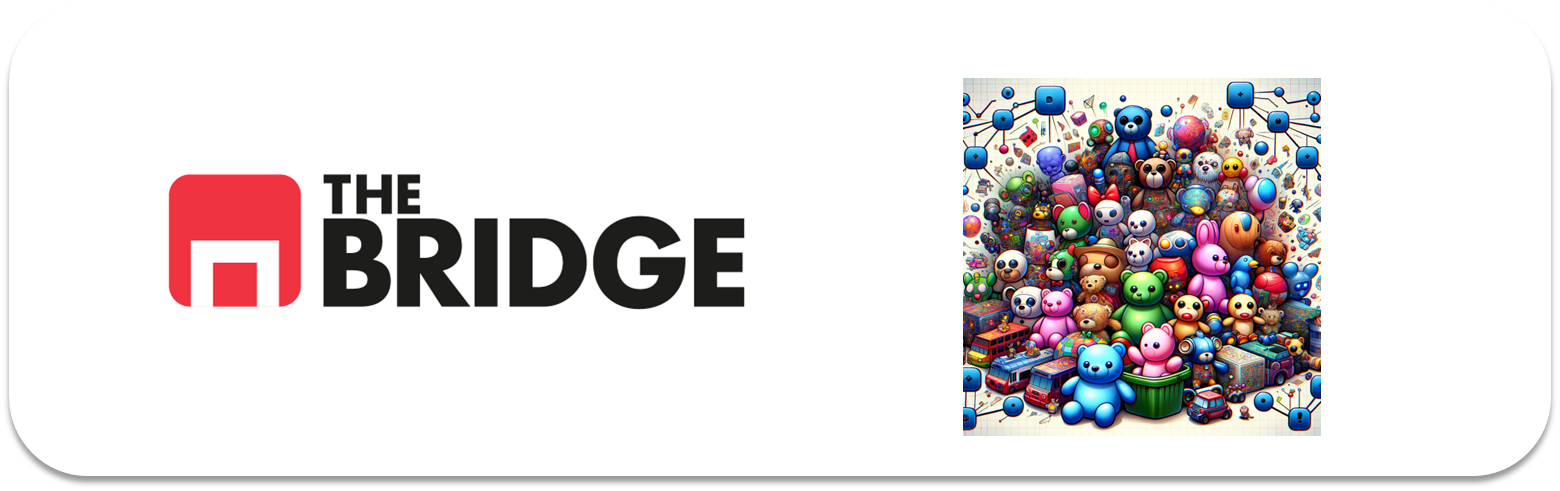

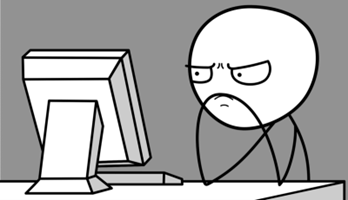

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [6]:
# Common imports
import numpy as np
import os
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


import bootcampviztools as bt
from toolbox_ML import *

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [8]:
from sklearn.datasets import fetch_olivetti_faces
df = fetch_olivetti_faces()

In [27]:
import pprint
# Imprimir la lista de listas usando pprint
pprint.pprint(df)


{'DESCR': '.. _olivetti_faces_dataset:\n'
          '\n'
          'The Olivetti faces dataset\n'
          '--------------------------\n'
          '\n'
          '`This dataset contains a set of face images`_ taken between April '
          '1992 and\n'
          'April 1994 at AT&T Laboratories Cambridge. The\n'
          ':func:`sklearn.datasets.fetch_olivetti_faces` function is the data\n'
          'fetching / caching function that downloads the data\n'
          'archive from AT&T.\n'
          '\n'
          '.. _This dataset contains a set of face images: '
          'https://cam-orl.co.uk/facedatabase.html\n'
          '\n'
          'As described on the original website:\n'
          '\n'
          '    There are ten different images of each of 40 distinct subjects. '
          'For some\n'
          '    subjects, the images were taken at different times, varying the '
          'lighting,\n'
          '    facial expressions (open / closed eyes, smiling / not smiling) '
  

In [9]:
df.data.shape

(400, 4096)

In [10]:
print(df.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [11]:
df.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
df.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [12]:
# Crear el DataFrame con los datos de las imágenes y los targets
df_2 = pd.DataFrame(df['data'])
df_2['target'] = df['target']

print("DataFrame con imágenes y targets:")
print(df_2.head())

# Reordenar aleatoriamente el DataFrame
df_shuffled = df_2.sample(frac=1).reset_index(drop=True)




DataFrame con imágenes y targets:
          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093   

In [13]:
print("DataFrame reordenado aleatoriamente:")
print(df_shuffled.head())

DataFrame reordenado aleatoriamente:
          0         1         2         3         4         5         6  \
0  0.198347  0.235537  0.351240  0.409091  0.421488  0.429752  0.500000   
1  0.185950  0.128099  0.115702  0.132231  0.185950  0.268595  0.433884   
2  0.508264  0.603306  0.619835  0.628099  0.657025  0.665289  0.690083   
3  0.136364  0.140496  0.185950  0.280992  0.318182  0.363636  0.409091   
4  0.652893  0.644628  0.652893  0.706612  0.714876  0.719008  0.743802   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.528926  0.524793  0.553719  ...  0.508264  0.524793  0.504132  0.483471   
1  0.541322  0.570248  0.586777  ...  0.396694  0.409091  0.301653  0.421488   
2  0.727273  0.743802  0.768595  ...  0.301653  0.305785  0.314050  0.326446   
3  0.417355  0.438017  0.454545  ...  0.169421  0.206612  0.276859  0.355372   
4  0.747934  0.747934  0.756198  ...  0.074380  0.074380  0.082645  0.082645   

       4091      4092      4093

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [29]:
# Contar las ocurrencias de cada valor en la columna 'target'
value_counts = df['target'].value_counts()

# Mostrar los resultados
print(value_counts)


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [15]:
# Paso 1: División inicial en 90% entrenamiento y 10% pruebas
df_train, df_test = train_test_split(df_2, test_size=40, stratify=df['target'], random_state=42)

# Paso 2: División del conjunto de entrenamiento en 80% entrenamiento y 20% validación (que es 10% del total)
df_train, df_val = train_test_split(df_2, test_size=80, stratify=df_2['target'], random_state=43)


In [16]:
# Verificación de las divisiones
print("Conjunto de entrenamiento:")
print(df_train['target'].value_counts())


Conjunto de entrenamiento:
target
7     8
19    8
39    8
3     8
11    8
6     8
15    8
26    8
20    8
31    8
25    8
37    8
5     8
2     8
18    8
10    8
34    8
35    8
36    8
30    8
38    8
21    8
22    8
33    8
16    8
27    8
14    8
17    8
4     8
28    8
1     8
23    8
24    8
8     8
32    8
9     8
29    8
12    8
13    8
0     8
Name: count, dtype: int64


In [ ]:
print("Conjunto de validación:")
print(df_val['target'].value_counts())

Conjunto de validación:
target
25    2
2     2
1     2
35    2
21    2
11    2
17    2
28    2
8     2
32    2
26    2
24    2
10    2
34    2
37    2
13    2
0     2
27    2
9     2
20    2
4     2
23    2
18    2
14    2
6     2
22    2
36    2
5     2
19    2
15    2
29    2
7     2
3     2
31    2
16    2
38    2
12    2
30    2
33    2
39    2
Name: count, dtype: int64


In [ ]:
print("Conjunto de pruebas:")
print(df_test['target'].value_counts())

Conjunto de pruebas:
target
3     1
7     1
30    1
35    1
32    1
23    1
9     1
1     1
24    1
14    1
4     1
18    1
17    1
5     1
34    1
38    1
28    1
27    1
12    1
0     1
21    1
36    1
20    1
25    1
15    1
6     1
2     1
13    1
37    1
31    1
11    1
29    1
39    1
33    1
8     1
26    1
22    1
10    1
16    1
19    1
Name: count, dtype: int64


### #1.4

Crea los pares X,y para train, validation y test.

In [17]:
# Crear los pares X, y para cada conjunto
X_train, y_train = df_train.drop(columns=['target']), df_train['target']
X_val, y_val = df_val.drop(columns=['target']), df_val['target']
X_test, y_test = df_test.drop(columns=['target']), df_test['target']

# Verificación de las divisiones y tamaños
print("Conjunto de entrenamiento:")
print(X_train.shape, y_train.shape)

print("Conjunto de validación:")
print(X_val.shape, y_val.shape)

print("Conjunto de pruebas:")
print(X_test.shape, y_test.shape)

Conjunto de entrenamiento:
(320, 4096) (320,)
Conjunto de validación:
(80, 4096) (80,)
Conjunto de pruebas:
(40, 4096) (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [20]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

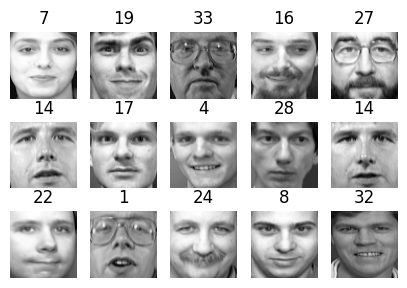

In [21]:
plot_faces(X_train.iloc[:15].values, y_train.iloc[:15].values)


### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

220

In [23]:
X_train_pca

array([[-6.46437550e+00, -3.70305228e+00,  1.23910534e+00, ...,
         6.70877919e-02, -1.79796189e-01,  3.57006080e-02],
       [ 2.20505551e-01,  1.16794777e+00, -8.49084675e-01, ...,
        -2.45994274e-02,  9.96059328e-02, -1.16025312e-02],
       [ 8.06583977e+00, -1.12284935e+00, -4.07391024e+00, ...,
        -1.14190079e-01, -7.26782158e-02,  1.13061383e-01],
       ...,
       [-2.12140918e+00,  3.80848002e+00,  3.44651580e+00, ...,
        -7.21345022e-02, -5.96828796e-02, -1.07343107e-01],
       [-1.81453180e+00,  1.35995233e+00,  1.93962359e+00, ...,
        -7.93891586e-03,  1.63107932e-01, -1.16727464e-01],
       [-2.83316731e+00,  3.66102725e-01,  5.41658163e+00, ...,
         6.50097355e-02,  7.23788440e-02,  4.03634682e-02]], dtype=float32)

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [24]:
# Encontrar el mejor k usando el score de silueta
best_k = 0
best_score = -1
silhouette_scores = []

for k in range(5, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Para k = {k}, el score de silueta es {silhouette_avg:.4f}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"El mejor k es {best_k} con un score de silueta de {best_score:.4f}")


Para k = 5, el score de silueta es 0.1070
Para k = 10, el score de silueta es 0.0886
Para k = 15, el score de silueta es 0.0945
Para k = 20, el score de silueta es 0.1071
Para k = 25, el score de silueta es 0.1207
Para k = 30, el score de silueta es 0.1185
Para k = 35, el score de silueta es 0.1321
Para k = 40, el score de silueta es 0.1394
Para k = 45, el score de silueta es 0.1424
Para k = 50, el score de silueta es 0.1563
Para k = 55, el score de silueta es 0.1739
Para k = 60, el score de silueta es 0.1747
Para k = 65, el score de silueta es 0.1799
Para k = 70, el score de silueta es 0.1893
Para k = 75, el score de silueta es 0.1915
Para k = 80, el score de silueta es 0.2026
Para k = 85, el score de silueta es 0.2016
Para k = 90, el score de silueta es 0.2023
Para k = 95, el score de silueta es 0.2050
Para k = 100, el score de silueta es 0.2091
Para k = 105, el score de silueta es 0.2119
Para k = 110, el score de silueta es 0.2179
Para k = 115, el score de silueta es 0.2151
Para k =

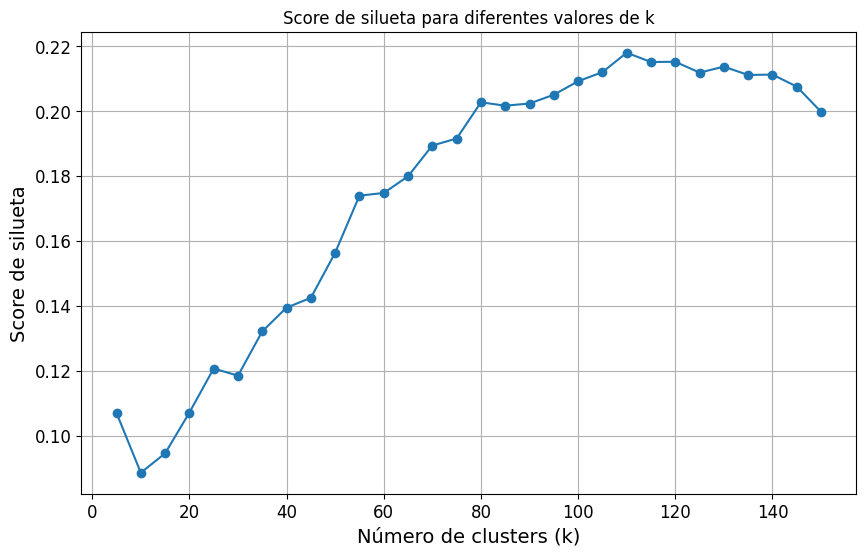

In [30]:
# Gráfico de los scores de silueta para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(5, 151, 5), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de silueta')
plt.title('Score de silueta para diferentes valores de k')
plt.grid(True)
plt.show()


### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [31]:
# Encontrar el número óptimo de clusters utilizando el método del codo
inertia_values = []
for k in range(1, 151, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia_values.append(kmeans.inertia_)

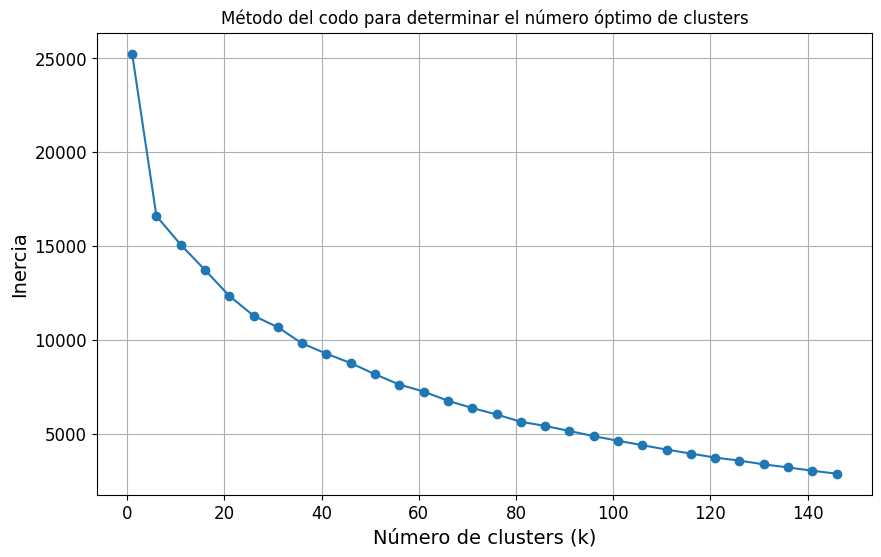

In [32]:
# Graficar la inercia en función del número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 151, 5), inertia_values, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [33]:
# Entrenar K-Means con el mejor k obtenido con el método del score de silueta
best_model = KMeans(n_clusters=best_k, random_state=42)
best_model.fit(X_train_pca)

KMeans(n_clusters=110, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

Cluster 0


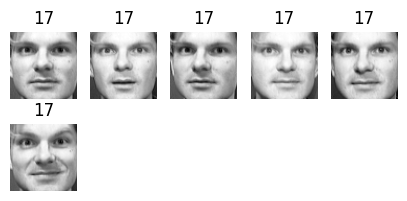

Cluster 1


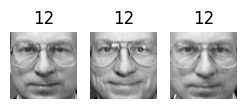

Cluster 2


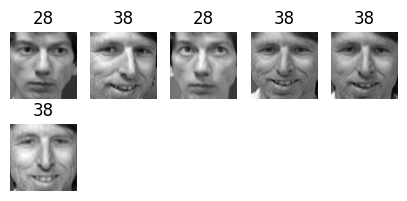

Cluster 3


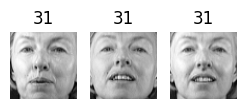

Cluster 4


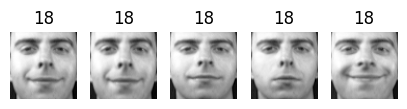

Cluster 5


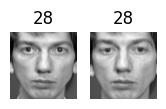

Cluster 6


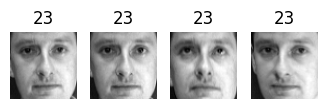

Cluster 7


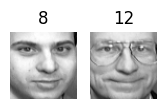

Cluster 8


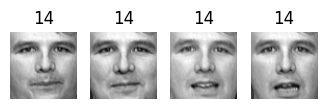

Cluster 9


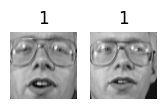

Cluster 10


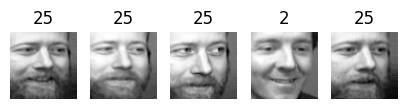

Cluster 11


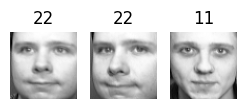

Cluster 12


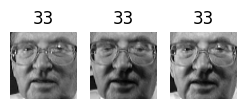

Cluster 13


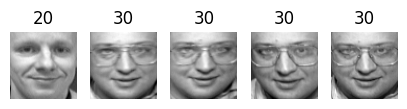

Cluster 14


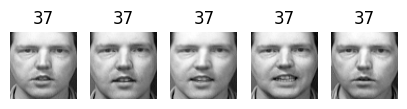

Cluster 15


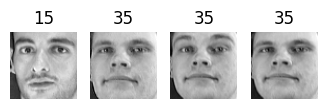

Cluster 16


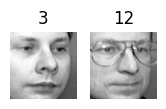

Cluster 17


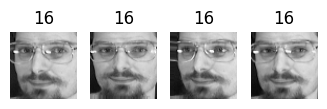

Cluster 18


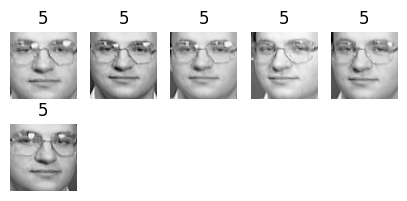

Cluster 19


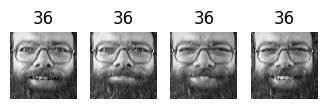

Cluster 20


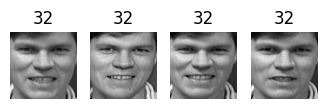

Cluster 21


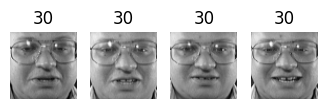

Cluster 22


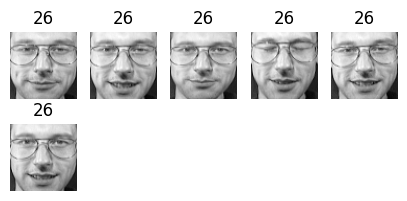

Cluster 23


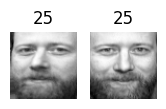

Cluster 24


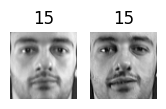

Cluster 25


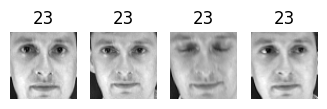

Cluster 26


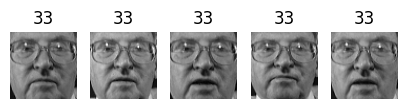

Cluster 27


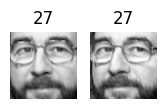

Cluster 28


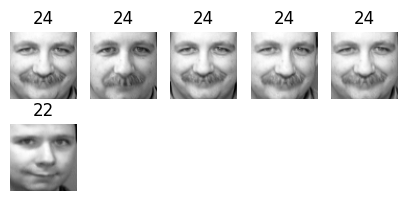

Cluster 29


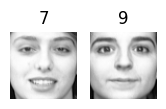

In [35]:
# Código del profesor
for cluster_id in np.unique(best_model.labels_)[0:30]:
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].values
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

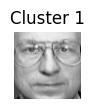

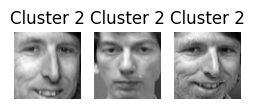

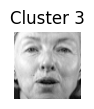

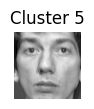

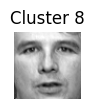

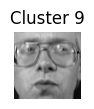

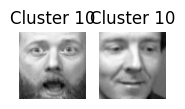

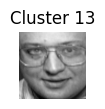

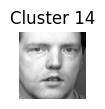

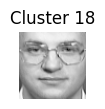

In [34]:
# Revisar codigo de profesor ver línea anterior de código
# Predicción de los clusters en el conjunto de validación
val_clusters = best_model.predict(X_valid_pca)

# Seleccionar las muestras de validación correspondientes a los 10 primeros clusters
clusters_to_visualize = np.unique(val_clusters)[:10]

# Visualizar las caras asignadas a los 10 primeros clusters
for cluster in clusters_to_visualize:
    cluster_indices = np.where(val_clusters == cluster)[0]
    cluster_faces = X_val.iloc[cluster_indices].values
    plot_faces(cluster_faces[:10], [f'Cluster {cluster}'] * 10)


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

El pca no nos ha hecho perder mucha información 0.96 es alto aunque sí al pintar imágenes.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Preparar los datos
#X_train, y_train = df_train.drop(columns=['target']), df_train['target']
#X_val, y_val = df_val.drop(columns=['target']), df_val['target']

# 2. Entrenar el clasificador
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)

# 3. Evaluar el clasificador en el conjunto de validación
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Precisión del clasificador en el conjunto de validación:", accuracy)


Precisión del clasificador en el conjunto de validación: 0.9625


In [46]:
# 2. Entrenar el clasificador en el PCA que tiene menos features
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)

# 3. Evaluar el clasificador en el conjunto de validación
y_pred = clf.predict(X_valid_pca)
accuracy = accuracy_score(y_val, y_pred)

print("Precisión del clasificador en el conjunto de validación:", accuracy)

Precisión del clasificador en el conjunto de validación: 0.975


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [ ]:
# Calcular las distancias de cada punto a los centroides en el conjunto de entrenamiento reducido
X_train_reduced = best_model.transform(X_train_pca)

# Calcular las distancias de cada punto a los centroides en el conjunto de validación
X_val_reduced = best_model.transform(X_valid_pca)

# Entrenar un clasificador utilizando las distancias como características de entrada
clf_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

# Evaluar el clasificador en el conjunto de validación
y_pred_reduced = clf_reduced.predict(X_val_reduced)
accuracy_reduced = accuracy_score(y_val, y_pred_reduced)

print("Precisión del clasificador en el conjunto de validación con reducción de dimensionalidad:", accuracy_reduced)


Precisión del clasificador en el conjunto de validación con reducción de dimensionalidad: 0.7875


In [41]:
#Versión profesor 2.2 
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_val)

0.7875

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

Para 140 clusters obtiene el mayor acc score

In [37]:
best_accuracy = 0
best_k = 0

for k in range(5, 151, 5):
    # Entrenar K-Means con el valor actual de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    
    # Calcular las distancias a los centroides en el conjunto de entrenamiento y validación
    X_train_distances = kmeans.transform(X_train_pca)
    X_val_distances = kmeans.transform(X_valid_pca)
    
    # Entrenar un clasificador RandomForest utilizando las distancias como características
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_distances, y_train)
    
    # Evaluar el rendimiento del clasificador en el conjunto de validación
    accuracy = accuracy_score(y_val, clf.predict(X_val_distances))
    
    # Actualizar el mejor rendimiento y el mejor valor de k
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("El mejor rendimiento se alcanza con k =", best_k)
print("Precisión del clasificador en el conjunto de validación:", best_accuracy)


El mejor rendimiento se alcanza con k = 140
Precisión del clasificador en el conjunto de validación: 0.8125


In [38]:
kmeans.labels_.shape

(320,)

In [42]:

for n_clusters in range(5, 151, 5):
    model = KMeans(n_clusters, n_init = 10, random_state = 42)
    model.fit(X_train_pca, y_train)
    X_temp = model.transform(X_train_pca)
    X_valid_temp = model.transform(X_valid_pca)
    rf_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
    rf_clf.fit(X_temp, y_train)
    print(n_clusters, rf_clf.score(X_valid_temp, y_val))

5 0.4875
10 0.5875
15 0.6
20 0.65
25 0.6875
30 0.7
35 0.75
40 0.7375
45 0.775
50 0.7625
55 0.75
60 0.7375
65 0.7625
70 0.7875
75 0.7625
80 0.7875
85 0.8
90 0.775
95 0.775
100 0.7625
105 0.75
110 0.7875
115 0.7875
120 0.775
125 0.7875
130 0.825
135 0.8125
140 0.7875
145 0.825
150 0.7875


Nuevo en clase pipeline para secuenciar pasos

In [43]:
from sklearn.pipeline import make_pipeline

for n_clusters in range(5, 151, 5):
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_val))

5 0.4875
10 0.5875
15 0.6
20 0.65
25 0.6875
30 0.7
35 0.75
40 0.7375
45 0.775
50 0.7625
55 0.75
60 0.7375
65 0.7625
70 0.7875
75 0.7625
80 0.7875
85 0.8
90 0.775
95 0.775
100 0.7625
105 0.75
110 0.7875
115 0.7875
120 0.775
125 0.7875
130 0.825
135 0.8125
140 0.7875
145 0.825
150 0.7875
